In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [ ]:
!git clone https://github.com/JCLMantilla/DataScienceExercise.git


fatal: destination path 'DataScienceExercise' already exists and is not an empty directory.


In [ ]:
Data_Original=pd.read_excel('/content/DataScienceExercise/base de datos data scien _Assesment_Cargo_Analitico_V01.xlsx')

In [ ]:
Data=Data_Original
print('Data Shape: '+str(Data.shape))
print('Features: ')
print(str(Data.columns.values))

Data Shape: (10000, 27)
Features: 
['Estado Cliente al final del periodo' 'Churn Total' 'Score A' 'Score B'
 'Tipo Vivienda' 'Zona Instalacion' 'Distrito' 'Estrato Declarado'
 'Producto' 'Premium Movie' 'Premium OBH' 'Premium Adultos' 'Tecnologia'
 'Catidad Decodificadores' 'Decodificadores Regular'
 'Decodificadores  DVR' 'Decodificadores  HD' 'Decodificadores  "HD ONLY"'
 'Metodo de Pago Estandarizado' 'Antigüedad' 'Canal Estandarizado'
 'Score Aprobación' 'Tecnología GO' 'Revista TELCO'
 'Cantidad Decodificadores Total' 'Tipo Suscripcion'
 'Campaña de Cobranza Actual']


# **Analisis exploratorio**

 **Balance de clases:**


In [ ]:
print('Vamos a contar cuantos elementos hay en cada clase: ')
print(Data['Churn Total'].value_counts())
print('Las clases estan balanceadas! esto es muy muy bueno a la hora de entrenar algun modelo')


Vamos a contar cuantos elementos hay en cada clase: 
1    5063
0    4937
Name: Churn Total, dtype: int64
Las clases estan balanceadas! esto es muy muy bueno a la hora de entrenar algun modelo


**Analisis de Scores A y B:** Vamos a investigar algunas propiedades de los Scores A y B, y vamos a intentar determinar cual de estas tiene una mayor relevancia en cuanto a poder predictivo de el Churn Total. Para esto vamos a usar la correlación y vamos a ajustar un modelo simple que nos ayude a corroborar los resultados.

Histogramas de Score A y B: 
Vamos a analizar el procentaje de valores faltantes en cada score (NaN)
Missing values Score A: 9.11%
Missing values Score B: 1.41%
Como vemos en cada score hacen falta algunos datos, sin embargo no considero que sea muy influyente 


,Churn Total,Score A,Score B
Churn Total,1.0,0.19118,-0.316711


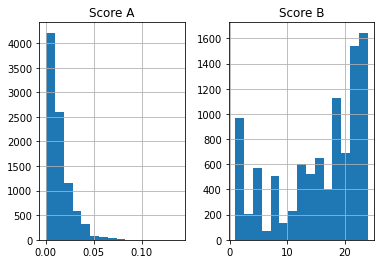

In [ ]:
#Vamos a checar como estan distribuidos los Scores A y B, y de paso vamos a poder ver los valores minimos y maximos
print('Histogramas de Score A y B: ')
Data[['Score A','Score B']].hist(bins=15)



print('Vamos a analizar el procentaje de valores faltantes en cada score (NaN)')
a=Data['Score A'].isna().sum()*100/Data['Score A'].shape[0]
b=Data['Score B'].isna().sum()*100/Data['Score B'].shape[0]
print('Missing values Score A: '+str(a)+'%')
print('Missing values Score B: '+str(b)+'%')
print('Como vemos en cada score hacen falta algunos datos, sin embargo no considero que sea muy influyente ')


#Vamos a sacar las correlaciones entre los scores y el churn total:
Data[['Churn Total', 'Score A', 'Score B']].corr()[:][:1]

In [ ]:
#Vamos a entrenar una regresion logistica para ver que tanta importancia le da el modelo a cada score.

from sklearn.linear_model import LogisticRegression

Logistic_Data=Data[['Churn Total','Score A', 'Score B']].dropna()



x_train=Logistic_Data[['Score A', 'Score B']]
y_train=Logistic_Data['Churn Total']


#NOTA: Es importantisimo normalizar los datos y sustraer la media, de esta forma nos aseguramos que la importancia de los scores sean comparables
scaler = sklearn.preprocessing.StandardScaler().fit(x_train)
scaler
x_train = scaler.transform(x_train)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
importance_A, importance_B= logistic_regression_model.coef_[0]

print('importance A = '+str(importance_A))
print('importance B = '+str(importance_B))


importance A = 0.48049781801049146
importance B = -0.6833863111525518


**Valores faltantes (NaN):** Vamos a eliminar las filas que contengan por lo menos un valor faltante. Vamos a perder bastantes datos, pero esto es importante para realizar un analisis completo de todas las feautures al mismo tiempo.

In [ ]:
#Vamos a sacar todas las filas que tengan un NaN en ellas: 
Clean_Data=Data.dropna()

print('Una vez eliminados todos los ejemplos que tenian por lo menos un NaN, el shape del set de entrenamiento es: ')
Clean_Data.shape

Una vez eliminados todos los ejemplos que tenian por lo menos un NaN, el shape del set de entrenamiento es: 


(3536, 27)

**One-hot encoding de variables categoricas:** En esta sección vamos a transformar las variables categoricas a one-hot encoding. Esto es importante para poder usarlas al entrenar un modelo mas adelante.

In [ ]:

#Ahora vamos a ver cuales features son categoricas, esto lo hacemos contando cuantos elementos unicos hay en cada columna
cols=Clean_Data.columns.values
dic={}
for col in cols:
  dic[col]=len(list(Clean_Data[col].unique()))

print('-------------------------------')
print('Variables y su numero de elementos unicos: ')
print(dic)
print('-------------------------------')
print('Vemos que podemos decir que las variables categoricas son las siguientes: ')
cat_cols=[
          'Estado Cliente al final del periodo',
          'Tipo Vivienda',
          'Zona Instalacion',
          'Distrito',
          'Producto',
          'Tecnologia',
          'Metodo de Pago Estandarizado',
          'Canal Estandarizado',
          'Tipo Suscripcion',
          'Campaña de Cobranza Actual'
          ]
print(cat_cols)
print('-------------------------------')

#Ahora vamos a cambiar todas las variables categoricas a one hot enconding
Data_Encoded=Clean_Data
for col in cat_cols:
  one_hot=pd.get_dummies(Data_Encoded[col])
  Data_Encoded=Data_Encoded.drop(col, axis=1)
  Data_Encoded=Data_Encoded.join(one_hot)
Data_Encoded.head(2)


-------------------------------
Variables y su numero de elementos unicos: 
{'Estado Cliente al final del periodo': 3, 'Churn Total': 2, 'Score A': 2564, 'Score B': 14, 'Tipo Vivienda': 2, 'Zona Instalacion': 3, 'Distrito': 6, 'Estrato Declarado': 6, 'Producto': 12, 'Premium Movie': 2, 'Premium OBH': 2, 'Premium Adultos': 2, 'Tecnologia': 4, 'Catidad Decodificadores': 6, 'Decodificadores Regular': 6, 'Decodificadores  DVR': 3, 'Decodificadores  HD': 5, 'Decodificadores  "HD ONLY"': 6, 'Metodo de Pago Estandarizado': 3, 'Antigüedad': 91, 'Canal Estandarizado': 4, 'Score Aprobación': 614, 'Tecnología GO': 2, 'Revista TELCO': 2, 'Cantidad Decodificadores Total': 6, 'Tipo Suscripcion': 3, 'Campaña de Cobranza Actual': 2}
-------------------------------
Vemos que podemos decir que las variables categoricas son las siguientes: 
['Estado Cliente al final del periodo', 'Tipo Vivienda', 'Zona Instalacion', 'Distrito', 'Producto', 'Tecnologia', 'Metodo de Pago Estandarizado', 'Canal Estandarizad

,Churn Total,Score A,Score B,Estrato Declarado,Premium Movie,Premium OBH,Premium Adultos,Catidad Decodificadores,Decodificadores Regular,Decodificadores DVR,Decodificadores HD,"Decodificadores ""HD ONLY""",Antigüedad,Score Aprobación,Tecnología GO,Revista TELCO,Cantidad Decodificadores Total,A - Activo,C - Cancelado,D - Desconectado,D - Normal Edificio,N- Normal Casa,EXTRARURAL,RURAL,URBANO,BOGOTA,CENTRO,NGOLDCCIDENTE,NORTE,OCCIDENTE,ORIENTE,BRONZE,BRONZE FULL,BRONZE MAX,Familiar,GOLD,GOLD FULL,GOLD MAX,Preferencial,Preferencial Total,SILVER,SILVER FULL,SILVER MAX,DVR,HD,HD_ONLY,REG,DA - Ahorros o Cte,DA - TC,INVOICE,Dealer,Directo,Nuevos Canales,Televentas (TP),Bundle,Cross Selling,Only TV,DX35_riesgo_alto_y_muy_alto,DX35_riesgo_medio_y_bajo
913,0,0.117720,21.0,2.0,0,0,0,2.0,2.0,0.0,0.0,0.0,15.0,649.0,0,0,2.0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1
915,0,0.111139,21.0,3.0,0,0,0,2.0,1.0,1.0,0.0,0.0,16.0,586.0,0,0,2.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1


In [ ]:
#Despues de este procedimiento tenemos la nueva shape del set de entrenamiento!
print('New training shape after cleaning and encoding: ')
print(str(Data_Encoded.shape))

New training shape after cleaning and encoding: 
(3536, 59)


**Random forest para determinar feature importance**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
nombre_features=Data_Encoded.columns.values[1:]

y_train=Data_Encoded['Churn Total']
x_train=Data_Encoded[Data_Encoded.columns[1:]]
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
importances=RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_], axis=0)

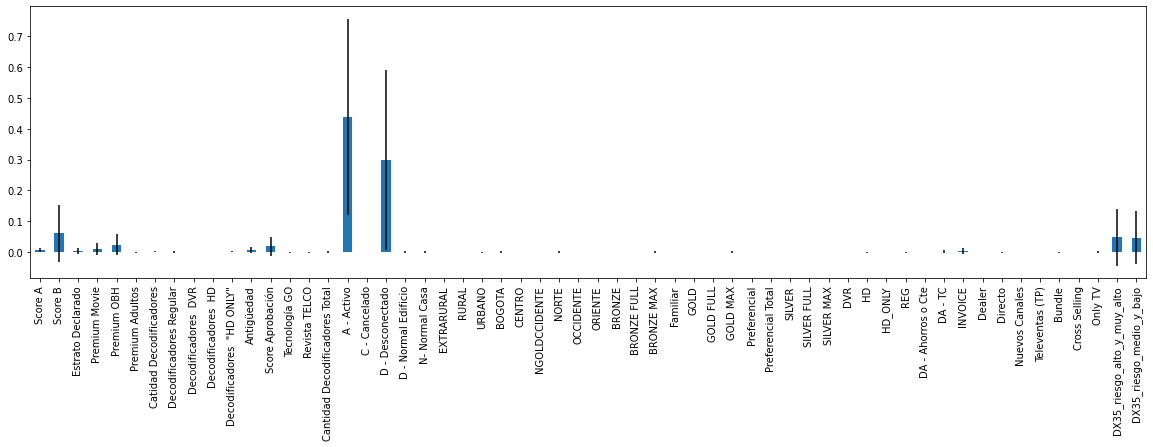

In [ ]:
forest_importances= pd.Series(importances, index=nombre_features)
fig,ax =plt.subplots(figsize=(20,5))
forest_importances.plot.bar(yerr=std, ax=ax)
